In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import pandas as pd

# Load data 
input_train_balanced = pd.read_csv('data/intput_train_balanced.csv')
output_train = input_train_balanced['binaryClass'].values
input_train_balanced = input_train_balanced.drop(['binaryClass'], axis=1)


In [38]:

# Define the parameter grid for grid search
param_grid = {
        'n_estimators': [10, 200],
        'max_depth': [1, 20],
        'min_samples_split': [2, 20],
        'min_samples_leaf': [1, 20],
        'max_features': ['auto', 'sqrt', 'log2', None],
}

# Create a random forest classifier
rf = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search =RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=100, scoring='accuracy', cv=10, random_state=42, n_jobs=-1)
    
# Fit the model to the balanced training dataset
grid_search.fit(input_train_balanced, output_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

/workspaces/thyroid_disease_AI/cilab/lib/python3.10/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'n_estimators': 10, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20}
Best Score: 0.991472316183016


/workspaces/thyroid_disease_AI/cilab/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
160 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/workspaces/thyroid_disease_AI/cilab/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/workspaces/thyroid_disease_AI/cilab/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/workspaces/thyroid_disease_AI/cilab/lib/python3.10/site-packages/sklearn/base.py", line 638, in _validate

In [39]:

# Create a random forest classifier with the best parameters
rf_best = RandomForestClassifier(**best_params)

rf_best.fit(input_train_balanced, output_train)

RandomForestClassifier(max_depth=20, max_features=None, min_samples_split=20,
                       n_estimators=10)

In [50]:
# Load test data 
import numpy as np
input_test = pd.read_csv('data/input_test.csv')
input_test.replace('?', np.nan, inplace=True)
input_test = input_test.dropna()
input_test=input_test.drop(['I131 treatment'], axis=1)
input_test['binaryClass'] = input_test['binaryClass'].astype('category').cat.codes.values
print(input_test['binaryClass'].value_counts())
input_test['pregnant'] = input_test['pregnant'].astype('category').cat.codes.values
output_test = input_test['binaryClass'].values
input_test = input_test.drop('binaryClass', axis=1)

binaryClass
1    512
0     40
Name: count, dtype: int64


In [41]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(sampling_strategy='auto')

# Balance the input test data
input_test, output_test = smote.fit_resample(input_test, output_test)

In [51]:
output_model_random = rf_best.predict_proba(input_test.values)[:, 1]
threshold = 0.5
# Convert probabilities to categorical values
output_model_random = (output_model_random >= threshold).astype(int)

/workspaces/thyroid_disease_AI/cilab/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [52]:
class_counts = np.bincount(output_model_random)

# Display the counts of each class
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} occurrences")

Class 0: 46 occurrences
Class 1: 506 occurrences


In [54]:
from utils import *



In [55]:
accuracy(output_test, output_model_random) # Pontuação de acurácia
    
precision(output_test, output_model_random) # Pontuação de precisão

recall(output_test, output_model_random) # Pontuação de recall

f1(output_test, output_model_random) # Pontuação de F1


A acurácia é de:  0.9855072463768116
A precisão é de:  0.9980237154150198
A pontuação de recall é de:  0.986328125
A pontuação de F1 é de:  0.9921414538310412


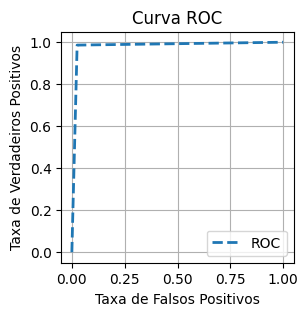

In [56]:
roc(output_test, output_model_random) # Plotando a curva ROC

In [57]:
plot_confusion_matrix(output_test, output_model_random, rf_best, title='Matriz confusão')


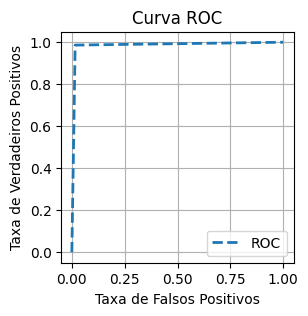

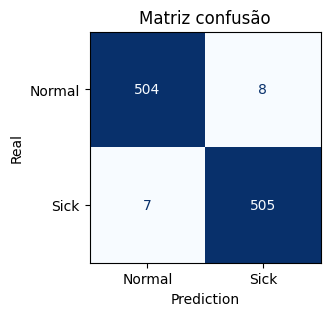

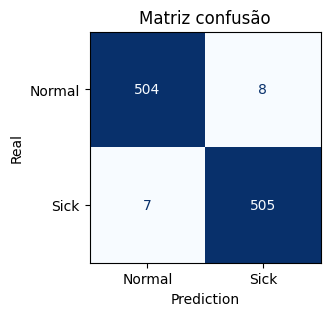

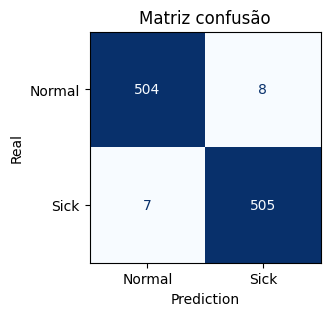

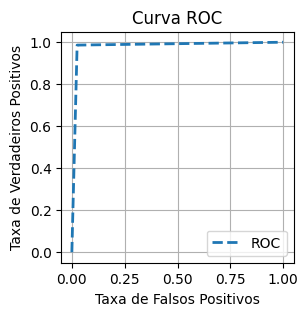

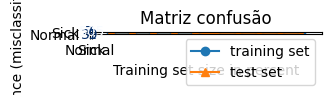

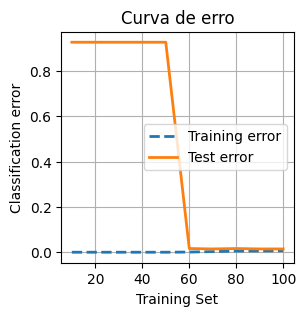

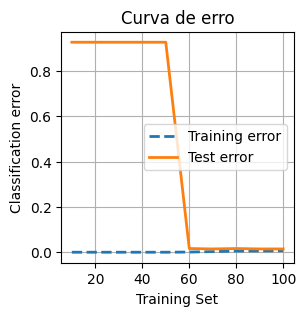

In [58]:
miss_classification(input_train_balanced, output_train, input_test, output_test,  rf_best) # Plotando a curva de erro

In [59]:
import joblib

#joblib.dump(rf_best, 'data/model.sav')

['data/model.sav']